In [4]:
%load_ext autoreload
%autoreload 2
import os, sys
sys.path.append('..')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster")
%load_ext line_profiler
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (11,8)

In [32]:
from merf.utils import MERFDataGenerator
from merf.merf import MERF

# Test Data Generation

In [42]:
dgm = MERFDataGenerator(m=.6, sigma_b=np.sqrt(4.5), sigma_e=1)

In [52]:
num_clusters_each_size = 1
train_sizes = [7, 9]
known_sizes = [63, 81]
new_sizes = [70, 90]

In [53]:
train_cluster_sizes = MERFDataGenerator.create_cluster_sizes_array(train_sizes, num_clusters_each_size)
known_cluster_sizes = MERFDataGenerator.create_cluster_sizes_array(known_sizes, num_clusters_each_size)
new_cluster_sizes = MERFDataGenerator.create_cluster_sizes_array(new_sizes, num_clusters_each_size)

In [54]:
len(train_cluster_sizes), len(known_cluster_sizes), len(new_cluster_sizes)

(2, 2, 2)

In [55]:
train, test_known, test_new, training_cluster_ids, ptev, prev = dgm.generate_split_samples(train_cluster_sizes, known_cluster_sizes, new_cluster_sizes)

INFO     [utils.py:164] Drew 320 samples from 4 clusters.
INFO     [utils.py:165] PTEV = 89.20359622856809, PREV = 54.46396672949858.


In [56]:
len(train), len(test_known), len(test_new)

(16, 144, 160)

In [57]:
train.head()

,y,X_0,X_1,X_2,Z,cluster
0,5.048030,0.403977,-0.642945,0.465257,1.0,0
1,6.265467,1.404621,-0.788585,1.625847,1.0,0
2,6.219084,1.879838,0.516437,-0.472274,1.0,0
3,4.223468,0.607317,0.646003,-0.740880,1.0,0
4,1.244755,-0.890759,-0.842052,-0.542031,1.0,0


# MERF Training

In [58]:
X_train = train[['X_0', 'X_1', 'X_2']]
Z_train = train[['Z']]
clusters_train = train['cluster']
y_train = train['y']

In [59]:
mrf = MERF(n_estimators=300, max_iterations=100)
mrf.fit(X_train, Z_train, clusters_train, y_train)

INFO     [merf.py:235] GLL is 39.12237319347477 at iteration 1.
INFO     [merf.py:235] GLL is 38.70673341248194 at iteration 2.
INFO     [merf.py:235] GLL is 38.89880139438688 at iteration 3.
INFO     [merf.py:235] GLL is 38.900415164834875 at iteration 4.
INFO     [merf.py:235] GLL is 39.5152131695921 at iteration 5.
INFO     [merf.py:235] GLL is 39.68903766568897 at iteration 6.
INFO     [merf.py:235] GLL is 39.61351500837149 at iteration 7.
INFO     [merf.py:235] GLL is 39.901516494169 at iteration 8.
INFO     [merf.py:235] GLL is 38.88538452334219 at iteration 9.
INFO     [merf.py:235] GLL is 39.909458240100214 at iteration 10.
INFO     [merf.py:235] GLL is 39.887637024493884 at iteration 11.
INFO     [merf.py:235] GLL is 40.02736317608179 at iteration 12.
INFO     [merf.py:235] GLL is 40.424389526373616 at iteration 13.
INFO     [merf.py:235] GLL is 40.46047064163921 at iteration 14.
INFO     [merf.py:235] GLL is 39.89740797734385 at iteration 15.
INFO     [merf.py:235] GLL is 40.

Text(0.5,0,'Iteration')

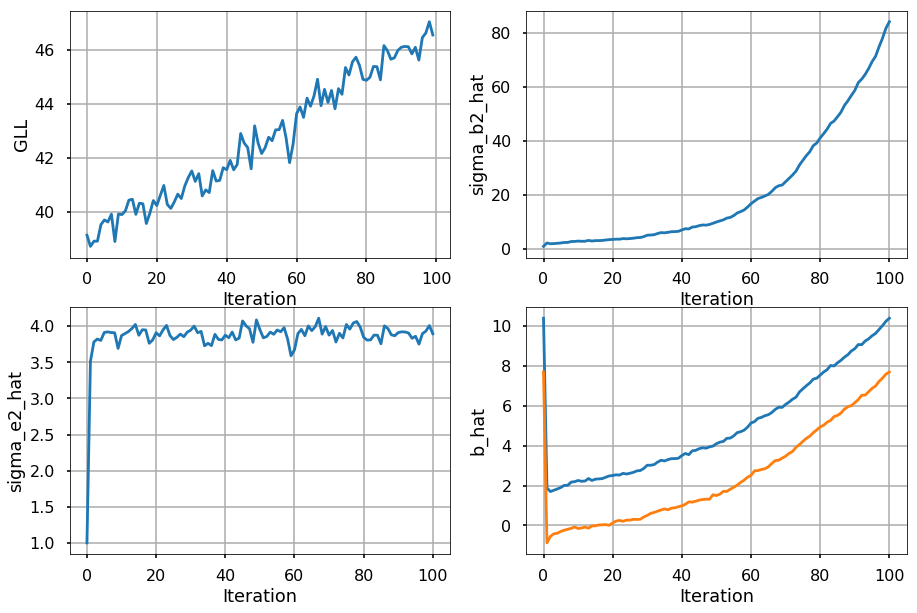

In [60]:
plt.figure(figsize=[15,10])
plt.subplot(221)
plt.plot(mrf.gll_history)
plt.grid('on')
plt.ylabel('GLL')
plt.xlabel('Iteration')

plt.subplot(222)
D_hat_history = [x[0][0] for x in mrf.D_hat_history]
plt.plot(D_hat_history)
plt.grid('on')
plt.ylabel('sigma_b2_hat')
plt.xlabel('Iteration')

plt.subplot(223)
plt.plot(mrf.sigma2_hat_history)
plt.grid('on')
plt.ylabel('sigma_e2_hat')
plt.xlabel('Iteration')

plt.subplot(224)
b_df = pd.concat(mrf.b_hat_history, axis=1)
b_df.columns = range(0, 101)
plt.plot(b_df.loc[0])
plt.plot(b_df.loc[1])
# plt.plot(b_df.loc[20])
# plt.plot(b_df.loc[30])
# plt.plot(b_df.loc[40])
# plt.plot(b_df.loc[50])
# plt.plot(b_df.loc[60])
plt.grid('on')
plt.ylabel('b_hat')
plt.xlabel('Iteration')

Text(0.5,1,'Distribution of b_is')

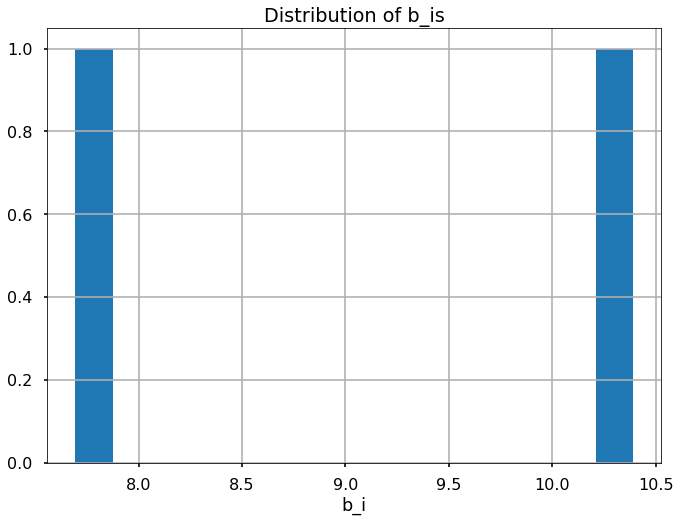

In [61]:
mrf.trained_b.hist(bins=15)
plt.xlabel('b_i')
plt.title('Distribution of b_is')